In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load REAL data
df_real = pd.read_parquet("NIDS_DF_processed.parquet")

# Load SYNTHETIC data
df_synthetic = pd.read_csv("synthetic_data.csv")

# Final output
print("Real data shape:", df_real.shape)
print("Synthetic data shape:", df_synthetic.shape)
print("Columns in real data:", df_real.columns.tolist())
print("Columns in synthetic data:", df_synthetic.columns.tolist())

Real data shape: (9156325, 13)
Synthetic data shape: (5000, 13)
Columns in real data: ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack', 'Attack_int']
Columns in synthetic data: ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Attack_int', 'Attack', 'Label']


In [13]:
# Calculate attack distributions
real_attacks = df_real['Attack'].value_counts(normalize=True)
synthetic_attacks = df_synthetic['Attack'].value_counts(normalize=True)

# Calculate attack ratios
real_attack_ratio = 1 - real_attacks.get('Benign', 0)
synthetic_attack_ratio = 1 - synthetic_attacks.get('Benign', 0)

print(f"Real attack ratio: {real_attack_ratio*100:.1f}%")
print(f"Synthetic attack ratio: {synthetic_attack_ratio*100:.1f}%")


Real attack ratio: 21.7%
Synthetic attack ratio: 62.3%


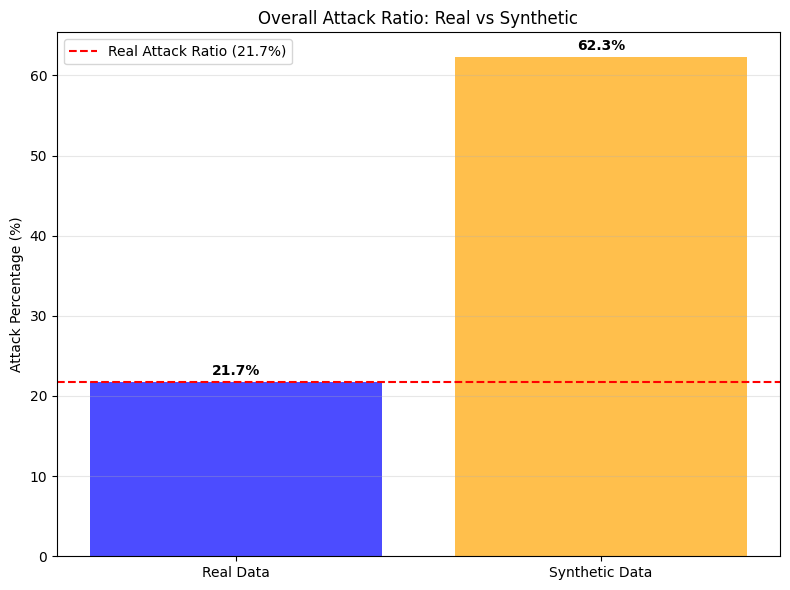

In [14]:
# Visualization 1: Overall attack ratio
plt.figure(figsize=(8, 6))
categories = ['Real Data', 'Synthetic Data']
ratios = [real_attack_ratio * 100, synthetic_attack_ratio * 100]

bars = plt.bar(categories, ratios, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Attack Percentage (%)')
plt.title('Overall Attack Ratio: Real vs Synthetic')
plt.axhline(y=real_attack_ratio*100, color='red', linestyle='--', 
           label=f'Real Attack Ratio ({real_attack_ratio*100:.1f}%)')

for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{ratio:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


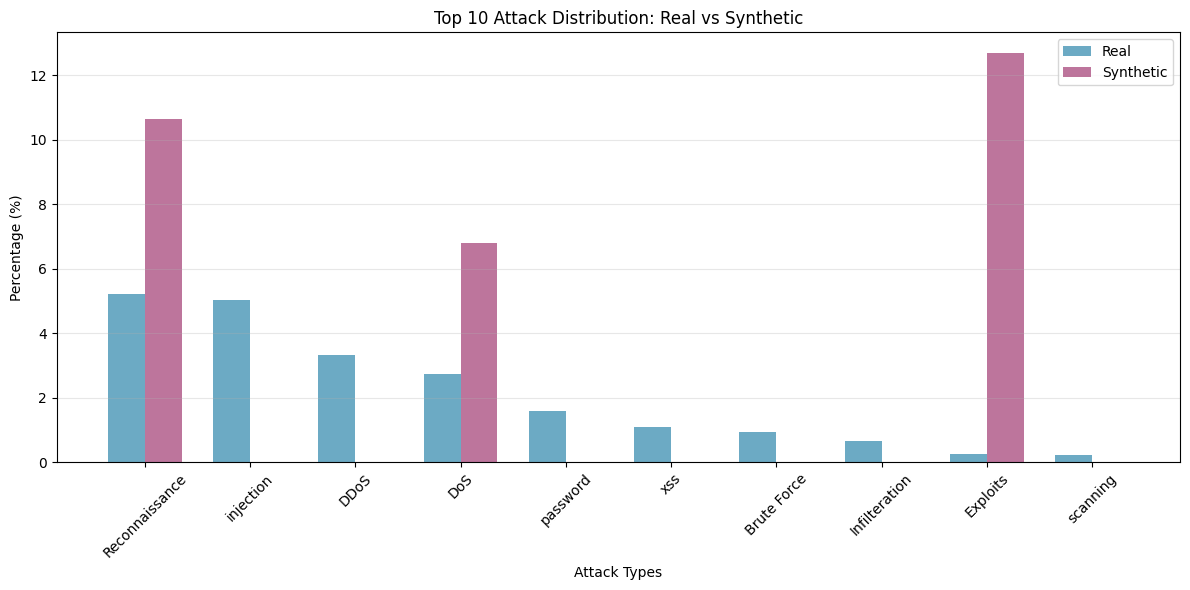

In [15]:
# Visualization 2: Compare top 10 attacks
# Exclude Benign
real_attacks_no_benign = real_attacks[real_attacks.index != 'Benign']
top_attacks = real_attacks_no_benign.head(10).index

x = range(len(top_attacks))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar([i - width/2 for i in x], [real_attacks.get(a,0)*100 for a in top_attacks],
        width, label='Real', alpha=0.7, color='#2E86AB')
plt.bar([i + width/2 for i in x], [synthetic_attacks.get(a,0)*100 for a in top_attacks],
        width, label='Synthetic', alpha=0.7, color='#A23B72')

plt.xlabel('Attack Types')
plt.ylabel('Percentage (%)')
plt.title('Top 10 Attack Distribution: Real vs Synthetic')
plt.xticks(x, top_attacks, rotation=45)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

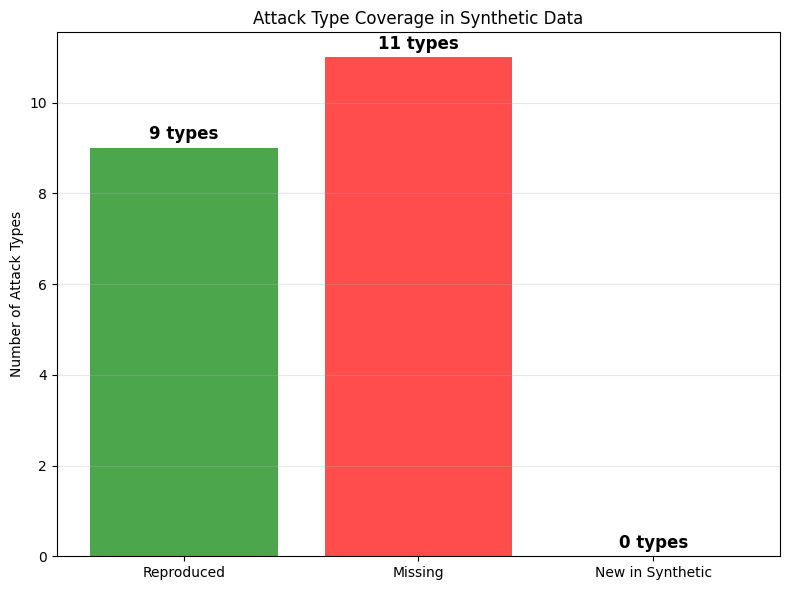

In [16]:
# Visualization 3: Attack Type Coverage
real_attack_types = set(df_real['Attack'].unique()) - {'Benign'}
synthetic_attack_types = set(df_synthetic['Attack'].unique()) - {'Benign'}
missing_attacks = real_attack_types - synthetic_attack_types
covered_attacks = real_attack_types & synthetic_attack_types
new_attacks = synthetic_attack_types - real_attack_types  # Attacks in synthetic but not in real

plt.figure(figsize=(8, 6))
categories = ['Reproduced', 'Missing', 'New in Synthetic']
counts = [len(covered_attacks), len(missing_attacks), len(new_attacks)]
colors = ['green', 'red', 'orange']

bars = plt.bar(categories, counts, color=colors, alpha=0.7)
plt.ylabel('Number of Attack Types')
plt.title('Attack Type Coverage in Synthetic Data')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{count} types', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [17]:
# Print key metrics
print(f"\nKey Metrics:")
print(f"Real data: {real_attack_ratio*100:.1f}% attacks")
print(f"Synthetic data: {synthetic_attack_ratio*100:.1f}% attacks")
print(f"Attack ratio preservation: {100-abs(real_attack_ratio*100 - synthetic_attack_ratio*100):.1f}%")
print(f"Attack types reproduced: {len(covered_attacks)}/{len(real_attack_types)} ({len(covered_attacks)/len(real_attack_types)*100:.1f}%)")

if missing_attacks:
    print(f"Missing attack types: {', '.join(sorted(missing_attacks))}")
else:
    print("All attack types were successfully reproduced!")

if new_attacks:
    print(f"New attack types in synthetic: {', '.join(sorted(new_attacks))}")


Key Metrics:
Real data: 21.7% attacks
Synthetic data: 62.3% attacks
Attack ratio preservation: 59.5%
Attack types reproduced: 9/20 (45.0%)
Missing attack types: Bot, Brute Force, DDoS, Infilteration, Theft, injection, mitm, password, ransomware, scanning, xss
